<a href="https://colab.research.google.com/github/ReemaB2/web/blob/main/Reports/Report_phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

Many individuals use social media daily without realizing its emotional impact. Excessive or unbalanced usage can lead to anxiety, sadness, boredom, and other negative states. The lack of awareness and early detection makes it harder to intervene before emotional distress escalates. This project tackles the problem by using data mining to identify risky usage patterns and predict emotional outcomes.



# Data Mining Task

This project applies two main data mining tasks:

Classification Task:
The goal is to predict the user's dominant emotional state (Dominant_Emotion), which includes categories like Happiness, Sadness, Anger, Anxiety, Boredom, and Neutral. This is a multi-class classification problem where we aim to classify individuals based on their social media usage patterns—such as time spent, posts per day, likes, comments, and platform used. By doing so, we can identify users at risk of negative emotional states and support early awareness and intervention.                                                                                                                                                            
Clustering Task:
This task aims to group users into clusters based on similarities in their social media behavior and engagement metrics. By analyzing features like usage time, interaction levels, and platform preferences, clustering helps uncover hidden subgroups—such as highly active users, passive users, or emotionally vulnerable groups. These insights can guide personalized recommendations and mental health strategies.


# Data Understanding
Description of the dataset, features, and initial observations

Dataset Source
Kaggle: https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being

Step A: Importing the dataset - Reading from local file...
Path to dataset file: https://raw.githubusercontent.com/WajdAlSuhaymi/IT326-DataMining-Group2/main/Dataset/Raw_dataset.csv
Dataset loaded successfully.

Step B: Understanding the Dataset
The dataset consists of rows and columns containing various features related to social media usage and emotional well-being.
Rows: 924, Columns: 10
Column names: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion']

Data Types of Columns:
User_ID                       float64
Age                           float64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object


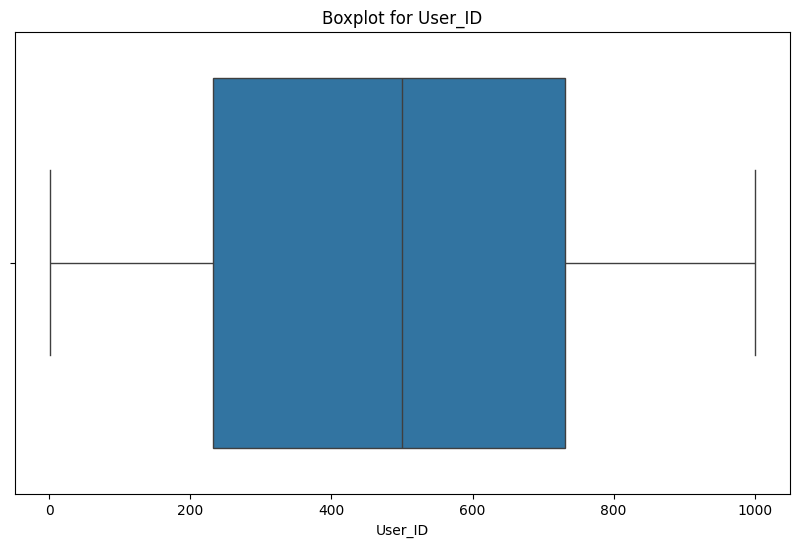

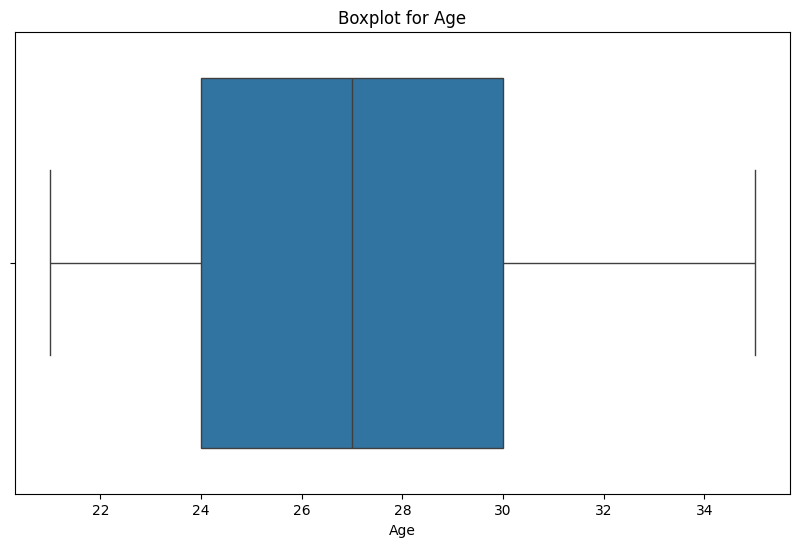

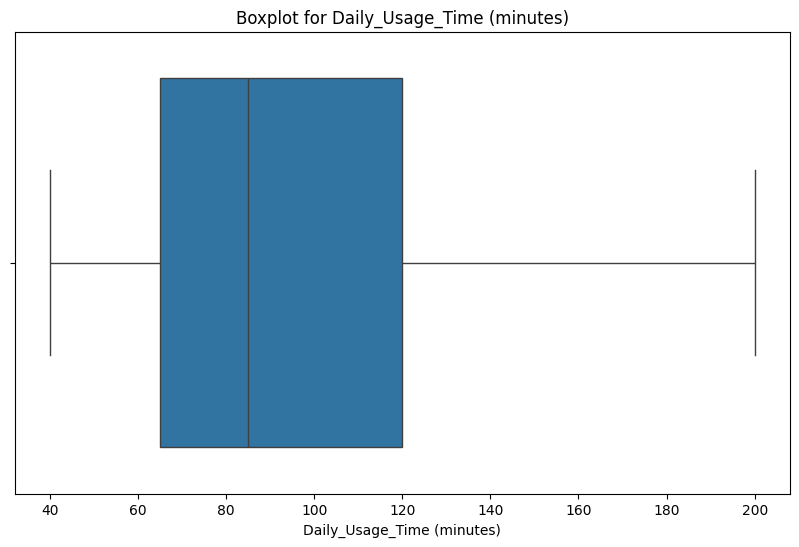

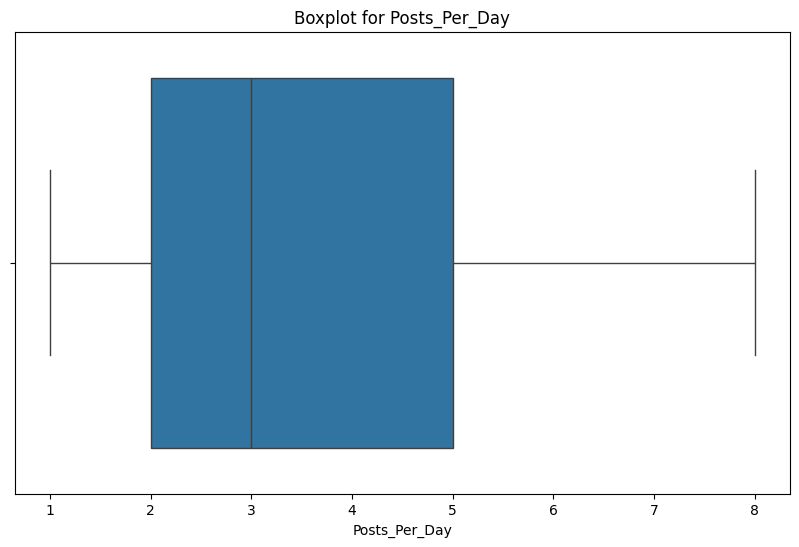

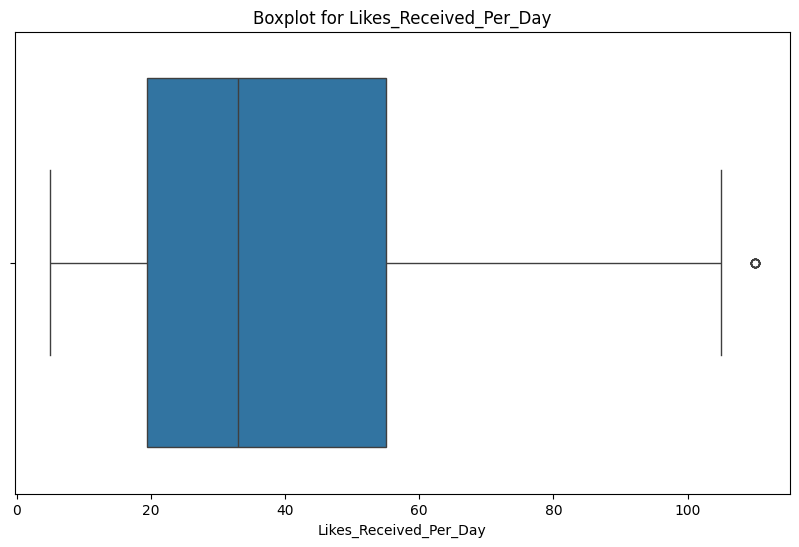

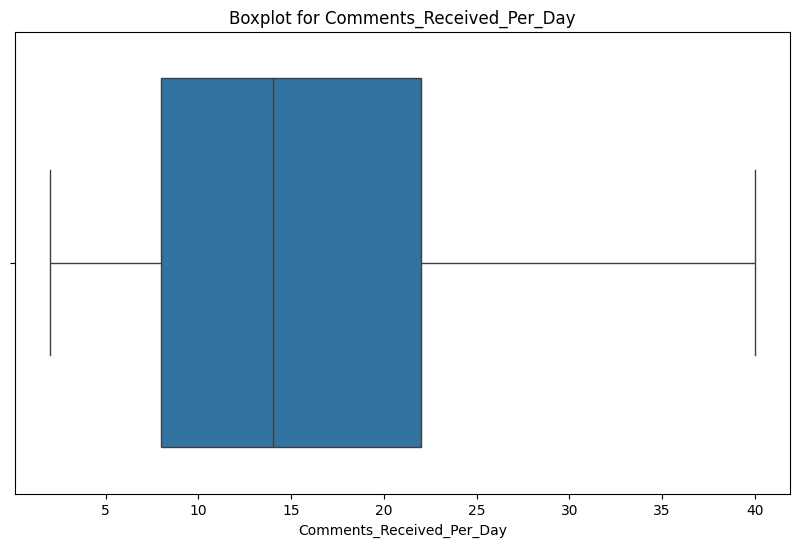

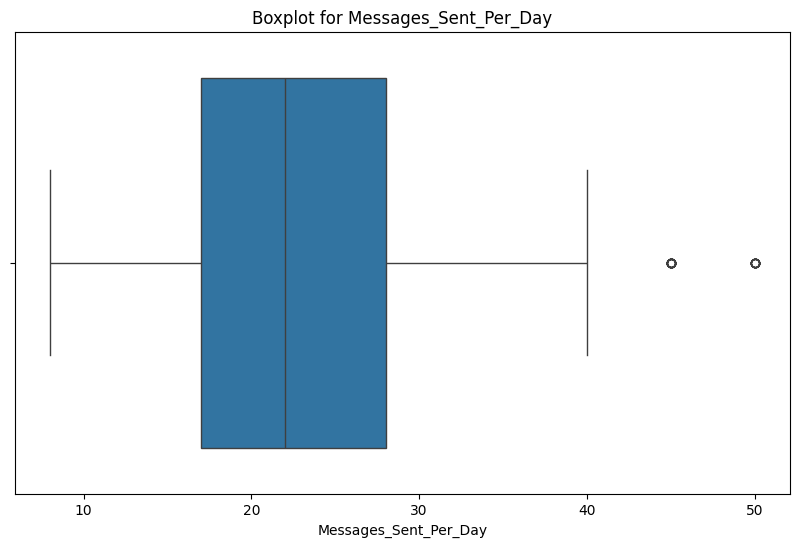


Step E: Data Visualization
Generating plots to understand feature distributions and relationships.

1. Histogram for Daily Usage Time:


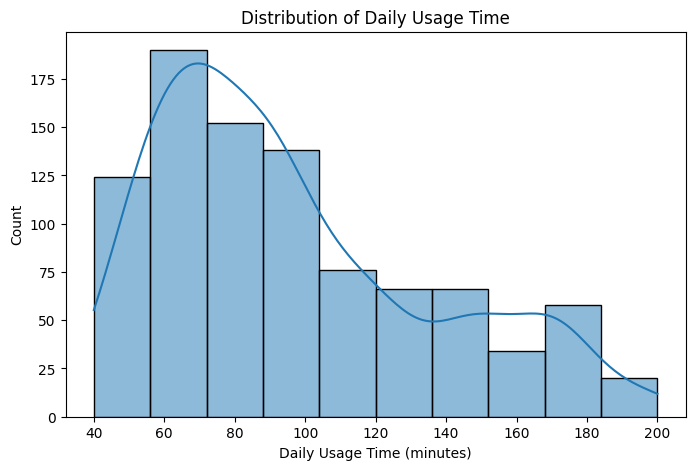

This histogram shows the distribution of daily social media usage time across the dataset. It helps understand user engagement patterns and identify common usage durations.

2. Bar Plot for Dominant Emotion Distribution:


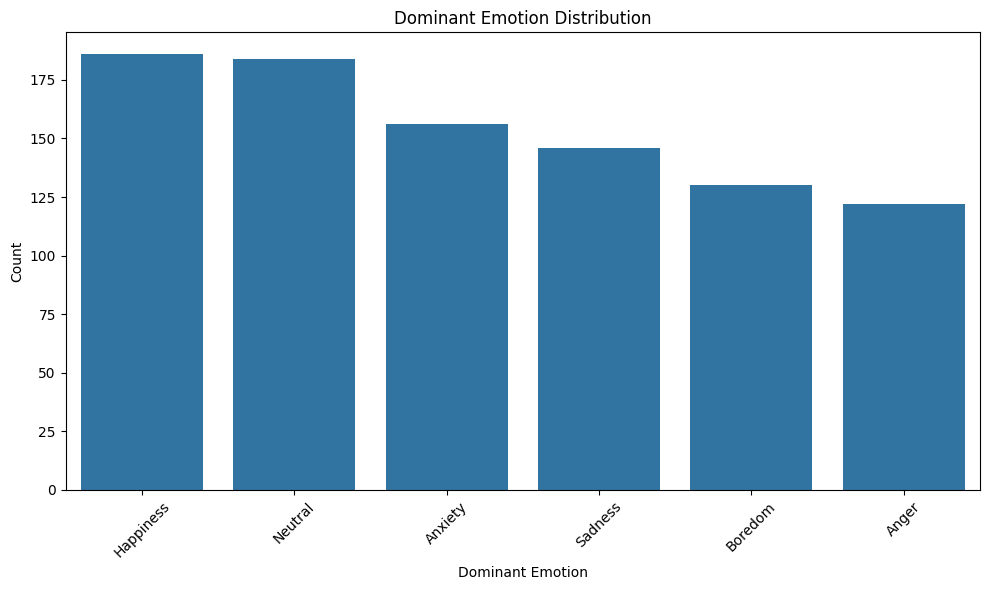

This bar plot shows the distribution of dominant emotions in the dataset. It's a nominal variable, and the count plot allows us to see the frequency of each emotional state among users.

3. Scatter Plot for Daily Usage Time vs Likes Received:


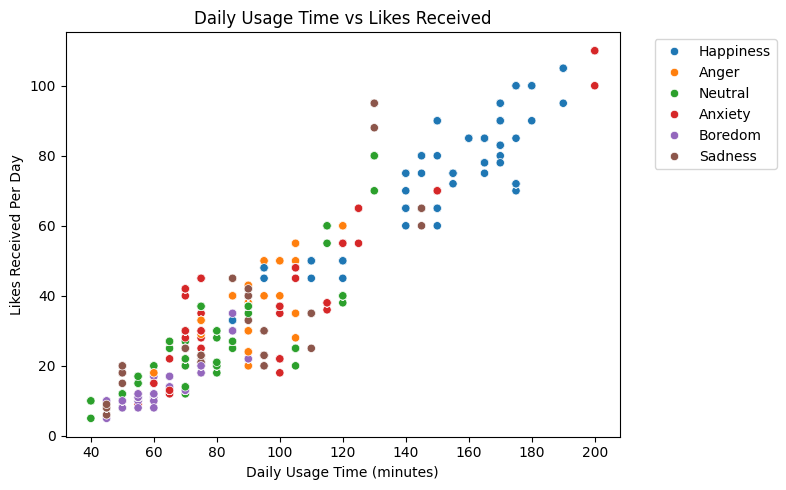

This scatter plot helps visualize the relationship between daily usage time and likes received.It can help identify any trends or patterns that might suggest a correlation between social media engagement and emotional states.

4. Correlation Heatmap of Numeric Features:


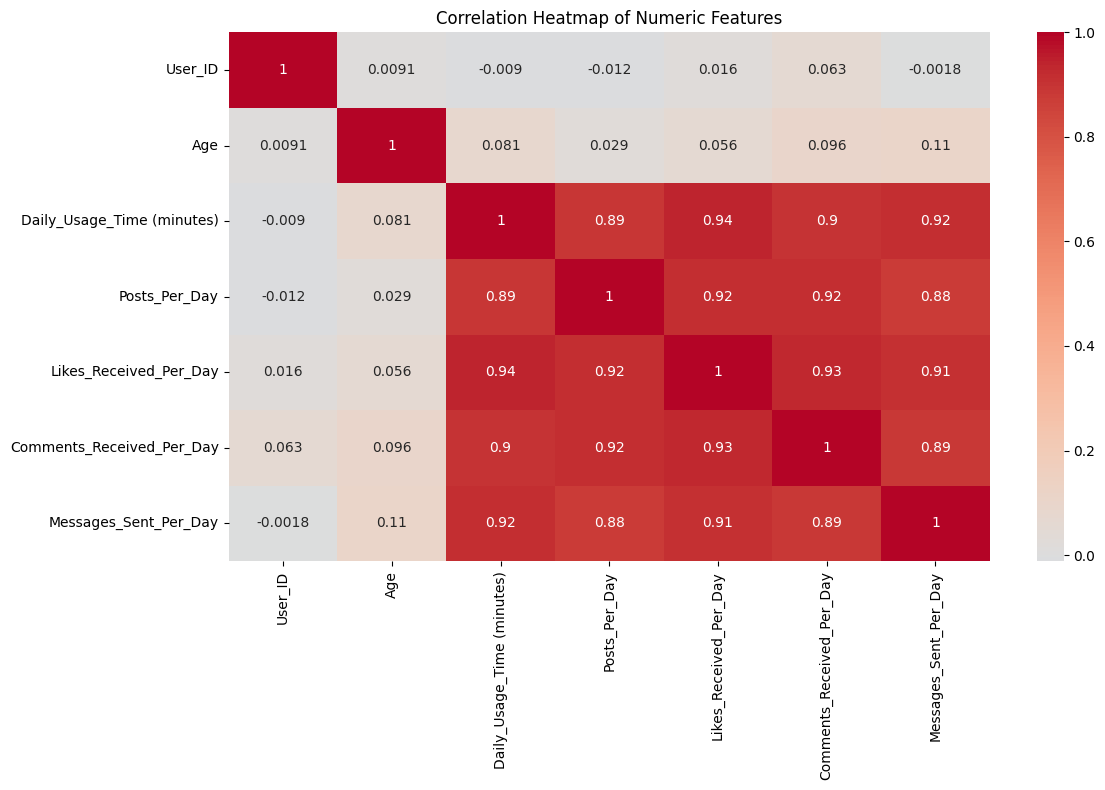

This heatmap shows the correlation between all numeric features. Strong correlations (close to 1 or -1) indicate relationships that might be important for our data mining tasks.

Concluding Observations from the Plots and Data Exploration:
From the above visualizations and statistical summaries, we can observe the following:
- The Dominant_Emotion distribution shows a relatively balanced dataset with Happiness and Neutral being the most common emotions.
- The Daily_Usage_Time distribution appears to have a normal distribution with some users showing extremely high usage patterns.
- The scatter plot between Daily_Usage_Time and Likes_Received_Per_Day suggests a positive correlation, indicating that active users tend to receive more engagement.
- The correlation heatmap reveals strong relationships between engagement metrics (Likes, Comments, Messages) and usage time.
- There are several potential outliers detected in engagement metrics that need to be addressed for better model performa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step A: Import the dataset
print("Step A: Importing the dataset - Reading from local file...")
dataset_path = 'https://raw.githubusercontent.com/WajdAlSuhaymi/IT326-DataMining-Group2/main/Dataset/Raw_dataset.csv'
print("Path to dataset file:", dataset_path)

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None

data = load_dataset()

if data is not None:
    # Step B: Dataset Overview
    print("\nStep B: Understanding the Dataset")
    print("The dataset consists of rows and columns containing various features related to social media usage and emotional well-being.")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("Column names:", data.columns.tolist())

    # Data types of the columns
    print("\nData Types of Columns:")
    print(data.dtypes)

    # Missing values
    print("\nMissing Values in Each Column:")
    print(data.isnull().sum())

    # Step C: Statistical Summary (Five-number summary, including outliers)
    print("\nStep C: Statistical Summary")
    print("We calculate statistical measures such as mean, variance, and percentiles to understand data distribution.")
    print(data.describe())

    # Step D: Class Label Distribution (Detect Class Imbalance)
    print("\nStep D: Analyzing Class Distribution")
    print("Checking the distribution of the class label to detect any imbalances in the dataset.")
    print(data['Dominant_Emotion'].value_counts())

    # Boxplot for numeric features to visualize potential outliers
    print("\nVisualizing Numeric Features with Boxplots:")
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        plt.show()

    # Step E: Data Visualization - Variable Distributions
    print("\nStep E: Data Visualization")
    print("Generating plots to understand feature distributions and relationships.")

    # 1. Histogram for Daily Usage Time (numeric attribute)
    print("\n1. Histogram for Daily Usage Time:")
    plt.figure(figsize=(8, 5))
    sns.histplot(data['Daily_Usage_Time (minutes)'], bins=10, kde=True)
    plt.title('Distribution of Daily Usage Time')
    plt.xlabel('Daily Usage Time (minutes)')
    plt.ylabel('Count')
    plt.show()
    print("This histogram shows the distribution of daily social media usage time across the dataset. It helps understand user engagement patterns and identify common usage durations.")

    # 2. Bar plot for Dominant Emotion (nominal attribute)
    print("\n2. Bar Plot for Dominant Emotion Distribution:")
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Dominant_Emotion', data=data, order=data['Dominant_Emotion'].value_counts().index)
    plt.title('Dominant Emotion Distribution')
    plt.xlabel('Dominant Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("This bar plot shows the distribution of dominant emotions in the dataset. It's a nominal variable, and the count plot allows us to see the frequency of each emotional state among users.")

    # 3. Scatter plot for Daily Usage Time vs Likes Received (numeric attributes)
    print("\n3. Scatter Plot for Daily Usage Time vs Likes Received:")
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['Daily_Usage_Time (minutes)'], y=data['Likes_Received_Per_Day'], hue=data['Dominant_Emotion'])
    plt.title('Daily Usage Time vs Likes Received')
    plt.xlabel('Daily Usage Time (minutes)')
    plt.ylabel('Likes Received Per Day')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("This scatter plot helps visualize the relationship between daily usage time and likes received.It can help identify any trends or patterns that might suggest a correlation between social media engagement and emotional states.")

    # 4. Correlation Heatmap
    print("\n4. Correlation Heatmap of Numeric Features:")
    plt.figure(figsize=(12, 8))
    numeric_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
    print("This heatmap shows the correlation between all numeric features. Strong correlations (close to 1 or -1) indicate relationships that might be important for our data mining tasks.")

    print("\nConcluding Observations from the Plots and Data Exploration:")
    print("From the above visualizations and statistical summaries, we can observe the following:")
    print("- The Dominant_Emotion distribution shows a relatively balanced dataset with Happiness and Neutral being the most common emotions.")
    print("- The Daily_Usage_Time distribution appears to have a normal distribution with some users showing extremely high usage patterns.")
    print("- The scatter plot between Daily_Usage_Time and Likes_Received_Per_Day suggests a positive correlation, indicating that active users tend to receive more engagement.")
    print("- The correlation heatmap reveals strong relationships between engagement metrics (Likes, Comments, Messages) and usage time.")
    print("- There are several potential outliers detected in engagement metrics that need to be addressed for better model performance.")
    print("Based on these insights, it is clear that the dataset is well-suited for both classification (predicting emotions) and clustering (grouping similar users) tasks.")


# Data Preprocessing
Summary of the cleaning, encoding, normalization, and feature preparation steps
Preprocessing Steps:

Removed irrelevant columns

Encoded Dominant_Emotion into numeric Emotion_Score

Normalized numerical features

Removed missing values

Prepared df_cluster for unsupervised learning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ==========================
# Load the dataset
# ==========================
dataset_path = "https://raw.githubusercontent.com/WajdAlSuhaymi/IT326-DataMining-Group2/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(dataset_path)

# Drop any completely empty rows (safety check)
df = df.dropna(how='all')

# Create a copy for preprocessing
df_processed = df.copy()

# ==========================
# Intro: Why Apply Data Preprocessing?
# ==========================
print("Why Apply Data Preprocessing?\n")
print("Data preprocessing is a crucial step in data mining and machine learning as it ensures that the dataset is clean,")
print("consistent, and ready for analysis or model training.")
print("Raw data may contain issues such as missing values, inconsistent data types, and features with different scales,")
print("all of which can negatively impact the performance and reliability of the results.\n")

print("In this project, we preprocess the Social Media Usage and Emotional Well-Being dataset using the following steps:\n")
print("1. Handling Missing Values in numeric features using the MEAN of each column.")
print("2. Age Grouping (Binning) for descriptive analysis (not added as a new column).")
print("3. Categorical Encoding for 'Gender' and 'Platform' using Label Encoding.")
print("4. Normalization (Min-Max Scaling) for selected numeric features (including Age and Gender).")
print("   The target variable 'Dominant_Emotion' is kept unchanged as the class label.\n")

# Snapshot of raw dataset
print("Raw Dataset Snapshot:")
print(df.head(), "\n")

# ==========================
# Step 1: Handling Missing Values (Numeric Columns)
# ==========================
print("Step 1: Handling Missing Values (Numeric Columns)")
print("We will convert selected features to numeric and fill missing values with the MEAN of each column.\n")

# Define numeric columns (same as in your original code)
numeric_cols = [
    "Age",
    "Daily_Usage_Time (minutes)",
    "Posts_Per_Day",
    "Likes_Received_Per_Day",
    "Comments_Received_Per_Day",
    "Messages_Sent_Per_Day"
]

# Convert to numeric (just in case there are non-numeric values)
df_processed[numeric_cols] = df_processed[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("Missing values before handling (df_processed):")
print(df_processed[numeric_cols].isnull().sum(), "\n")

# Fill missing numeric values with the mean of each column
for col in numeric_cols:
    df_processed[col] = df_processed[col].fillna(df_processed[col].mean())

print("Missing values after handling (df_processed):")
print(df_processed[numeric_cols].isnull().sum(), "\n")
print("✔ Numeric columns cleaned and missing values filled using MEAN.\n")

# ==========================
# Step 2: Age Binning (For Analysis Only)
# ==========================
print("Step 2: Age Grouping (Binning) for Descriptive Analysis")
print("We create age groups based on the REAL Age column, but we DO NOT add them as a new feature in the dataset.")
print("This step is only used to describe the age distribution in the report.\n")

bins = [20, 25, 30, 35]
labels = ['21–25', '26–30', '31–35']

age_binned_temp = pd.cut(df_processed["Age"], bins=bins, labels=labels, include_lowest=True)

print("Age Group Distribution (for analysis only):")
print(age_binned_temp.value_counts(), "\n")
print("✔ Age binning completed (not stored as a column).\n")

# ==========================
# Step 3: Categorical Encoding (Label Encoding)
# ==========================
print("Step 3: Categorical Encoding (Label Encoding)")
print("We apply Label Encoding on 'Gender' and 'Platform' so they can be used as numeric features.\n")

label_cols = ["Gender", "Platform"]
label_encoders = {}

for col in label_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nEncoded Categorical Features (head):")
print(df_processed[label_cols].head(), "\n")
print("✔ Label encoding applied on Gender and Platform.\n")

# ==========================
# Step 4: Normalization (Min-Max Scaling)
# ==========================
print("Step 4: Normalization (Min-Max Scaling)")
print("We apply Min-Max scaling to selected numeric features so that all values fall in the range [0, 1].")
print("This helps clustering algorithms treat all features fairly regardless of their original units.\n")

numeric_to_scale = [
    "Age",
    "Daily_Usage_Time (minutes)",
    "Posts_Per_Day",
    "Likes_Received_Per_Day",
    "Comments_Received_Per_Day",
    "Messages_Sent_Per_Day",
    "Gender"  # Gender is now numeric and included in scaling as in your original code
]

scaler = MinMaxScaler()
df_processed[numeric_to_scale] = scaler.fit_transform(df_processed[numeric_to_scale])

print("Normalized Numerical Features (head):")
print(df_processed[numeric_to_scale].head(), "\n")
print("✔ Normalization applied on selected numeric columns (including Age & Gender).\n")

# ==========================
# Step 5: Remove User_ID (if exists)
# ==========================
print("Step 5: Removing 'User_ID' (if exists)")
if "User_ID" in df_processed.columns:
    df_processed = df_processed.drop(columns=["User_ID"])
    print("✔ 'User_ID' column removed from df_processed.\n")
else:
    print("ℹ 'User_ID' not found in df_processed. No column removed.\n")

# ==========================
# Step 6: Final Summary & Saving the Dataset
# ==========================
print("Step 6: Preprocessing Summary")
print("=" * 60)
print(f"Final dataset shape: {df_processed.shape}")
print(f"Numeric features normalized: {len(numeric_to_scale)}")
print(f"Categorical features encoded: {len(label_cols)}")
print(f"Total missing values after preprocessing: {df_processed.isnull().sum().sum()}")

print("\nPreprocessed Dataset Snapshot:")
print(df_processed.head())

# If Dominant_Emotion exists, show its class distribution
if "Dominant_Emotion" in df_processed.columns:
    print("\nClass Distribution of 'Dominant_Emotion' After Preprocessing:")
    print(df_processed["Dominant_Emotion"].value_counts())

# Save the preprocessed dataset (same name you used before)
output_filename = "Preprocessed_dataset.csv"
df_processed.to_csv(output_filename, index=False)
print(f"\nPreprocessed dataset saved as '{output_filename}'")

print("\nConclusion:")
print("The dataset has been successfully preprocessed with the following transformations:")
print("✓ Missing numeric values handled using the MEAN of each column")
print("✓ Age groups generated for descriptive analysis (not added as a feature)")
print("✓ 'Gender' and 'Platform' encoded using Label Encoding")
print("✓ Selected numeric features normalized to [0, 1] using Min-Max Scaling")
print("✓ The dataset is now ready for data mining techniques such as clustering and classification.")


Why Apply Data Preprocessing?

Data preprocessing is a crucial step in data mining and machine learning as it ensures that the dataset is clean,
consistent, and ready for analysis or model training.
Raw data may contain issues such as missing values, inconsistent data types, and features with different scales,
all of which can negatively impact the performance and reliability of the results.

In this project, we preprocess the Social Media Usage and Emotional Well-Being dataset using the following steps:

1. Handling Missing Values in numeric features using the MEAN of each column.
2. Age Grouping (Binning) for descriptive analysis (not added as a new column).
3. Categorical Encoding for 'Gender' and 'Platform' using Label Encoding.
4. Normalization (Min-Max Scaling) for selected numeric features (including Age and Gender).
   The target variable 'Dominant_Emotion' is kept unchanged as the class label.

Raw Dataset Snapshot:
   User_ID   Age      Gender   Platform  Daily_Usage_Time (mi

# Data Mining Technique
Explanation of the classification algorithms, clustering approach, and rationale for technique selection.

5. Data Mining Technique – Classification

Why Classification?
Build a classification model to predict users' dominant emotional states (Happiness, Anger, Neutral, Anxiety, Boredom, Sadness) based on their social media behavior patterns.
- Enables understanding of how social media usage correlates with emotional well-being
- Helps identify key behavioral indicators of different emotional states
- Supports mental health professionals in detecting potential emotional issues through digital behavior

Applied Methodology:
- Used Decision Tree Classifier for its interpretability and ability to handle mixed data types
- Utilized all preprocessed features from Preprocessed_dataset.csv
- Split data into training/testing sets with three different partitions (60-40, 70-30, 80-20)
- Tested two attribute selection measures: Gini Index and Information Gain (Entropy)

Evaluation Metrics:
- Accuracy: Overall correctness of predictions
- Precision: Accuracy of positive predictions for each emotion cla

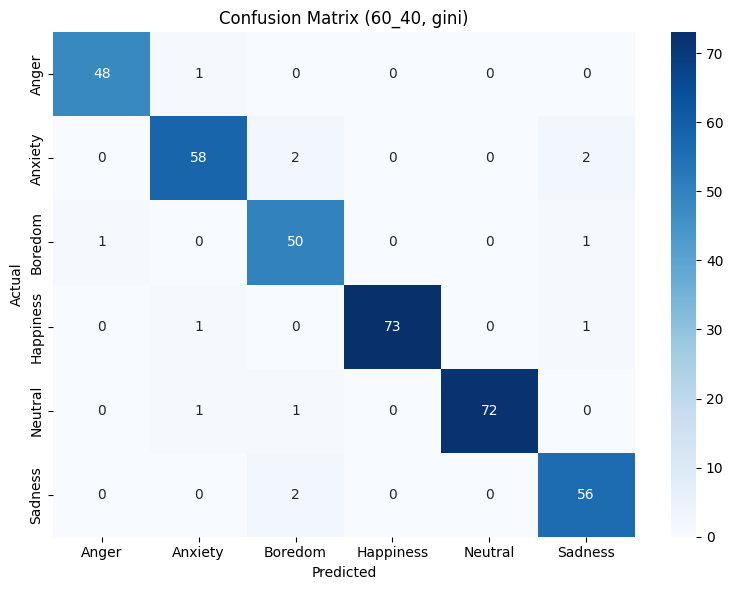

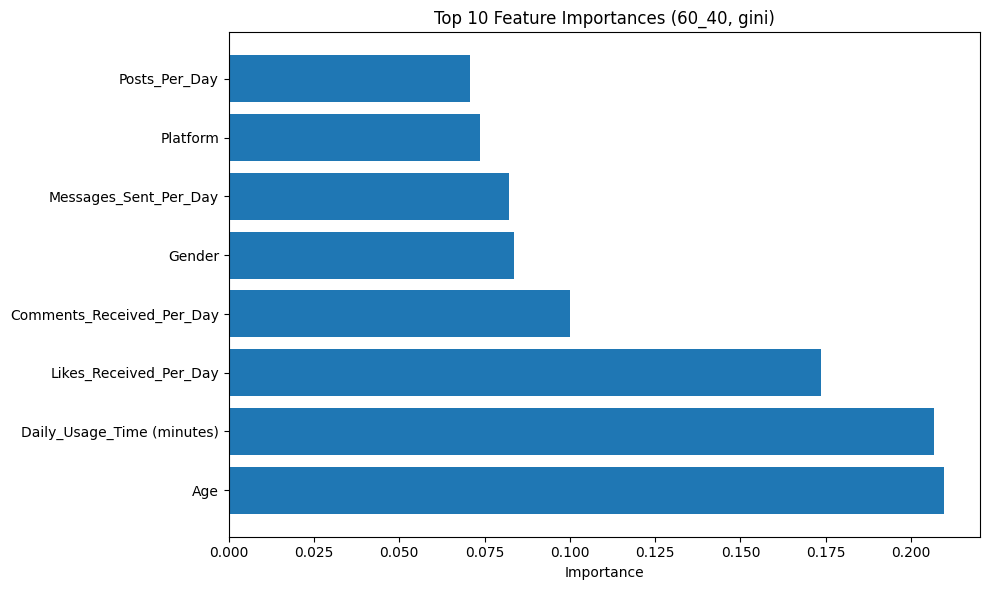


🔹 Configuration: 60_40 split | ENTROPY criterion
---------------------------------------------
✅ Accuracy: 0.9541 (95.41%)


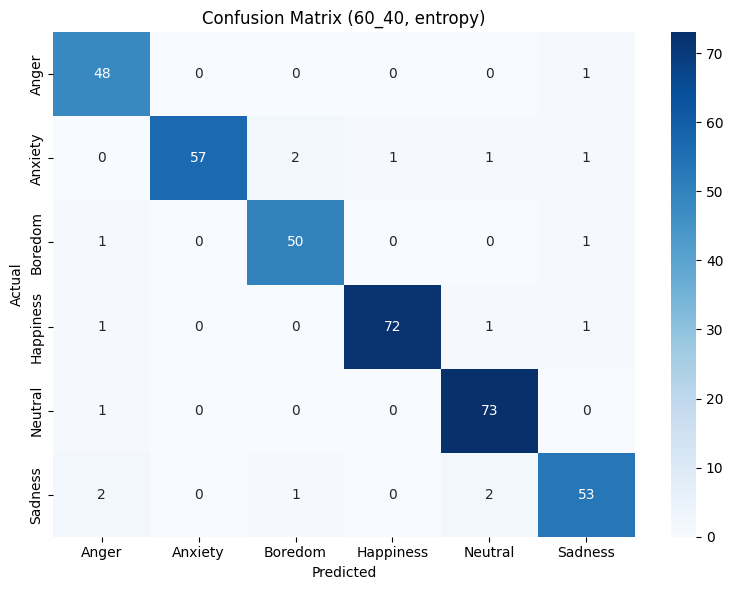

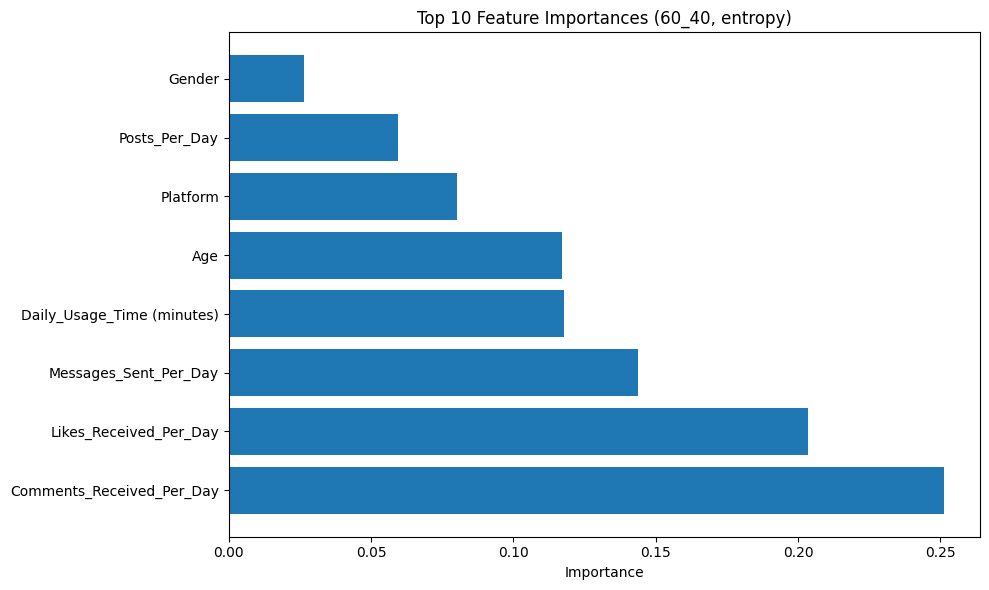


🔹 Configuration: 70_30 split | GINI criterion
---------------------------------------------
✅ Accuracy: 0.9676 (96.76%)


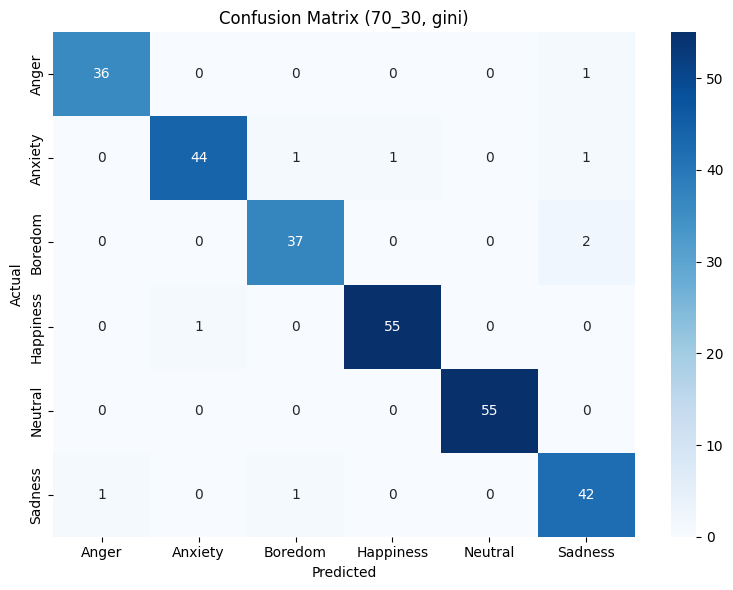

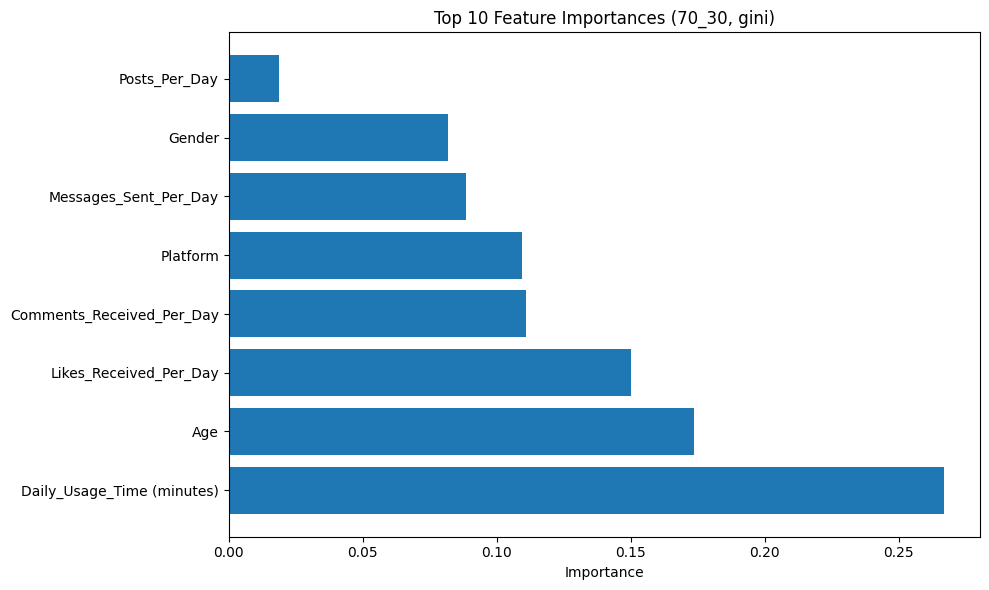


🔹 Configuration: 70_30 split | ENTROPY criterion
---------------------------------------------
✅ Accuracy: 0.9604 (96.04%)


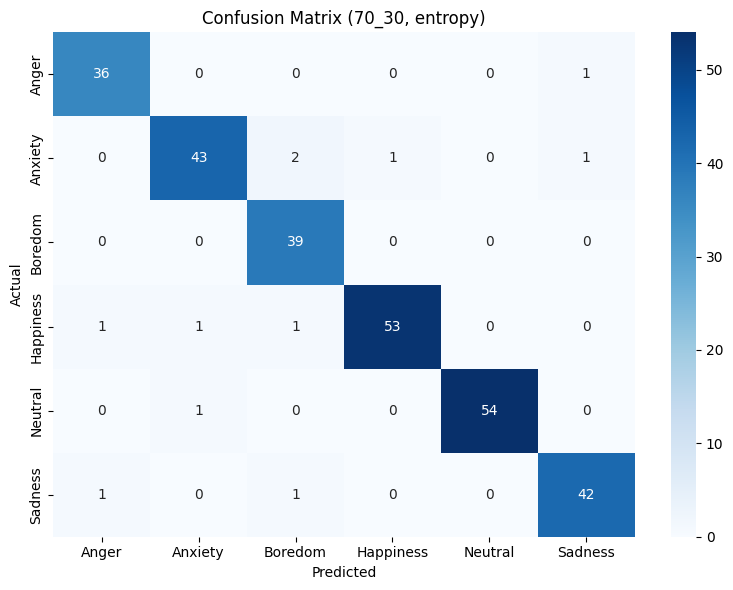

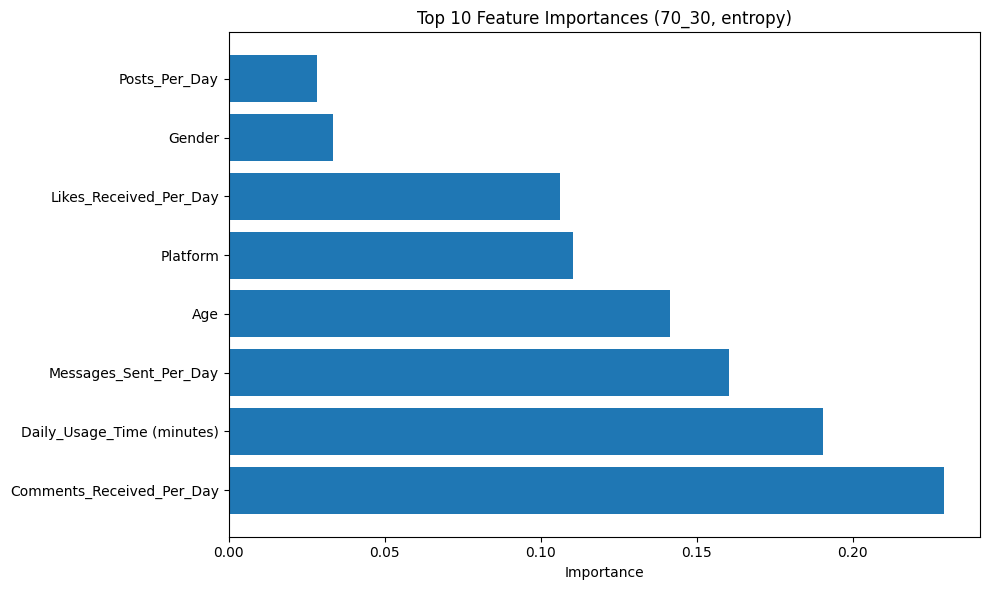


🔹 Configuration: 80_20 split | GINI criterion
---------------------------------------------
✅ Accuracy: 0.9730 (97.30%)


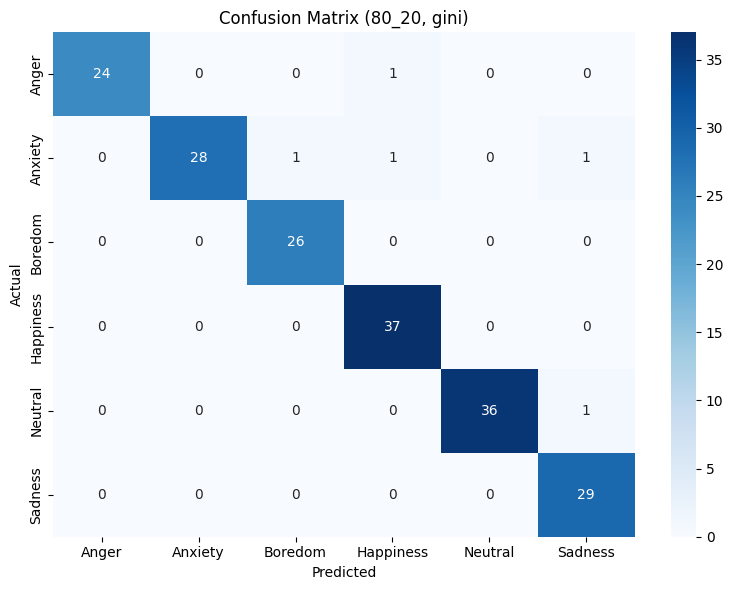

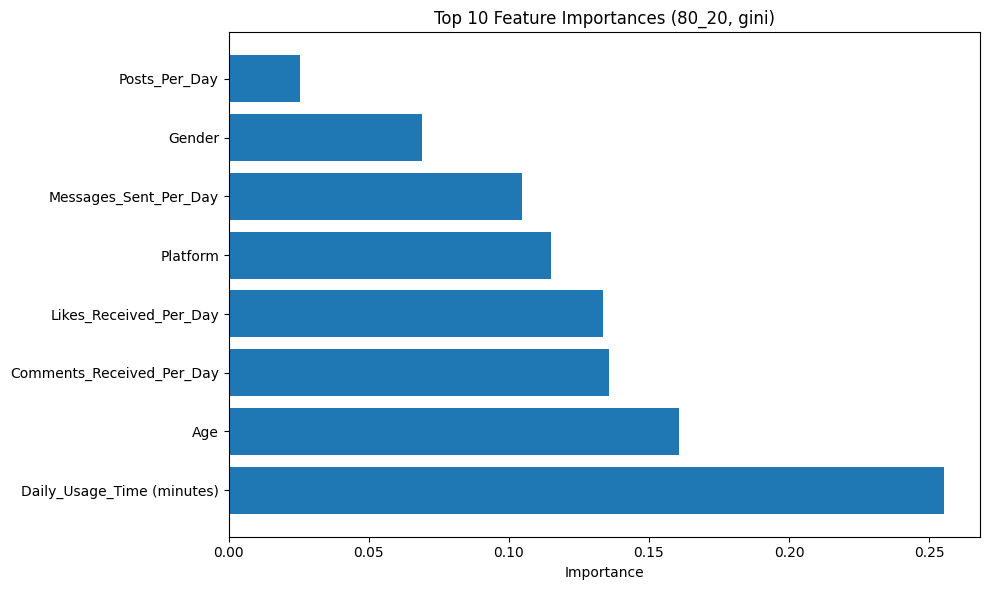


🔹 Configuration: 80_20 split | ENTROPY criterion
---------------------------------------------
✅ Accuracy: 0.9568 (95.68%)


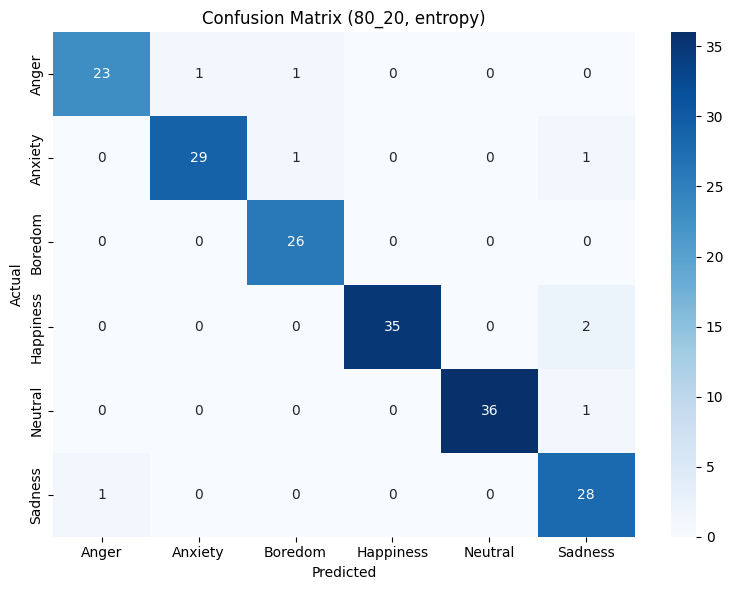

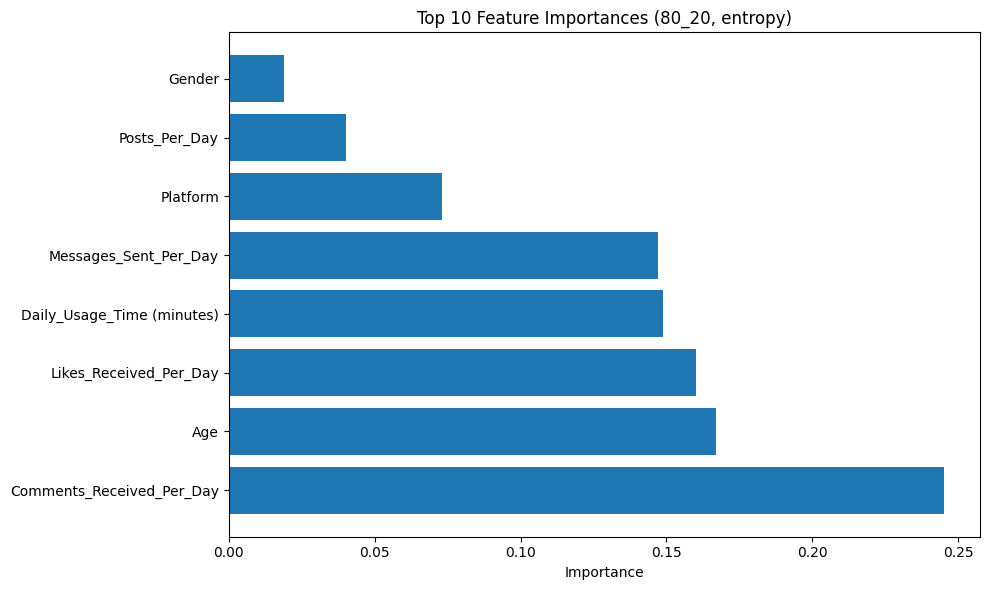


CLASSIFICATION RESULTS SUMMARY
Split Criterion Accuracy Accuracy (%)
60_40      GINI   0.9649       96.49%
60_40   ENTROPY   0.9541       95.41%
70_30      GINI   0.9676       96.76%
70_30   ENTROPY   0.9604       96.04%
80_20      GINI   0.9730       97.30%
80_20   ENTROPY   0.9568       95.68%

🏆 BEST PERFORMANCE: 80_20 split with GINI criterion
   Accuracy: 0.9730 (97.30%)

5. Data Mining Technique – Clustering

Why Clustering?
- Discover natural groupings of users based on social media behavior patterns
- Identify distinct user segments without prior emotional labels
- Understand behavioral archetypes across different platforms and usage patterns
- Complement classification results with unsupervised insights

Applied Methodology:
- Used K-Means clustering algorithm for its efficiency and interpretability
- Utilized all behavioral features from the preprocessed dataset (excluding the class label)
- Tested multiple K values (2, 5, 7) to identify optimal cluster structure
- Applied P

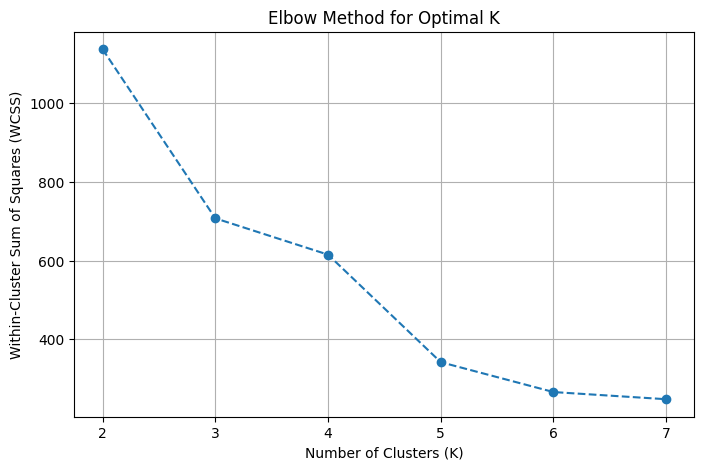

🔹 Silhouette Score Analysis...
K = 2, Silhouette Score = 0.6147
K = 3, Silhouette Score = 0.5188
K = 4, Silhouette Score = 0.4541
K = 5, Silhouette Score = 0.5256
K = 6, Silhouette Score = 0.5412
K = 7, Silhouette Score = 0.5196


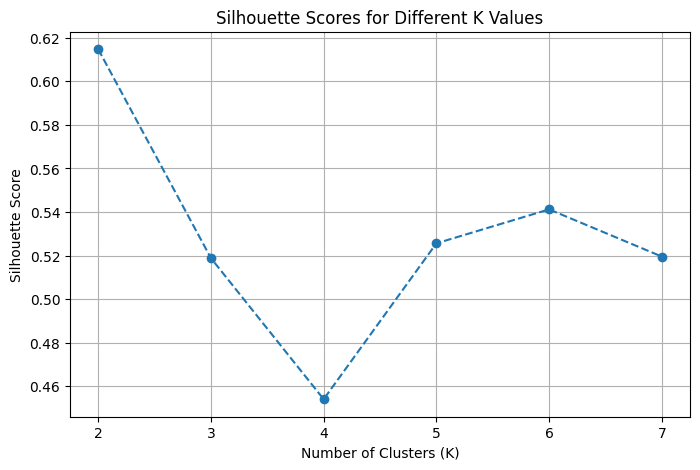

🔹 Applying K-Means Clustering...

📊 K = 2
   Silhouette Score: 0.6147
   WCSS: 1136.90
   Cluster distribution:
     Cluster 0: 532 users (57.6%)
     Cluster 1: 392 users (42.4%)

📊 K = 5
   Silhouette Score: 0.5256
   WCSS: 341.78
   Cluster distribution:
     Cluster 0: 178 users (19.3%)
     Cluster 1: 256 users (27.7%)
     Cluster 2: 186 users (20.1%)
     Cluster 3: 68 users (7.4%)
     Cluster 4: 236 users (25.5%)

📊 K = 7
   Silhouette Score: 0.5196
   WCSS: 247.66
   Cluster distribution:
     Cluster 0: 178 users (19.3%)
     Cluster 1: 114 users (12.3%)
     Cluster 2: 118 users (12.8%)
     Cluster 3: 68 users (7.4%)
     Cluster 4: 236 users (25.5%)
     Cluster 5: 136 users (14.7%)
     Cluster 6: 74 users (8.0%)
🔹 Cluster Visualization using PCA...


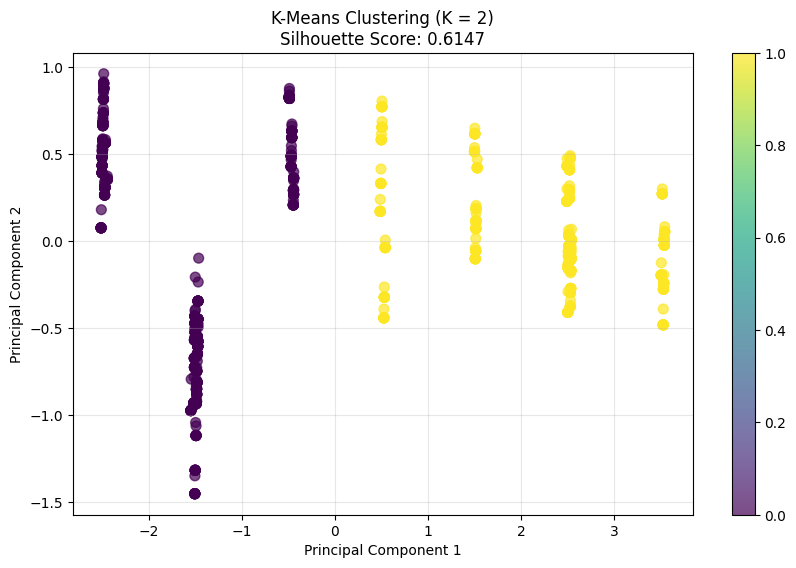

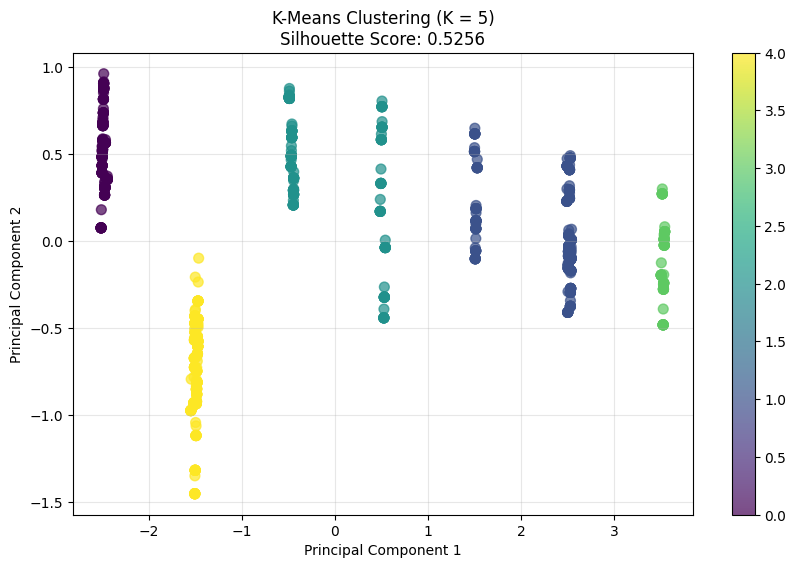

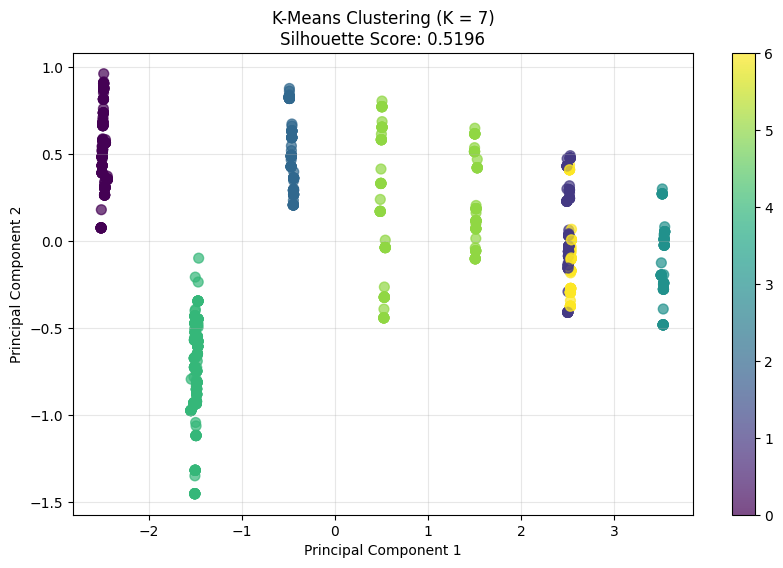


CLUSTERING RESULTS COMPARISON
 K Silhouette Score    WCSS   Interpretation
 2           0.6147 1136.90 Strong structure
 5           0.5256  341.78 Strong structure
 7           0.5196  247.66 Strong structure

🎯 RECOMMENDED CLUSTERS: K = 2
   - Highest silhouette score among tested K values
   - Clear and interpretable separation between user segments


In [ ]:
# ============================================
# 5. Data Mining Technique – Classification
# ============================================

print("5. Data Mining Technique – Classification")
print("=" * 50)

print("\nWhy Classification?")
print("Build a classification model to predict users' dominant emotional states "
      "(Happiness, Anger, Neutral, Anxiety, Boredom, Sadness) based on their social media behavior patterns.")
print("- Enables understanding of how social media usage correlates with emotional well-being")
print("- Helps identify key behavioral indicators of different emotional states")
print("- Supports mental health professionals in detecting potential emotional issues through digital behavior")

print("\nApplied Methodology:")
print("- Used Decision Tree Classifier for its interpretability and ability to handle mixed data types")
print("- Utilized all preprocessed features from Preprocessed_dataset.csv")
print("- Split data into training/testing sets with three different partitions (60-40, 70-30, 80-20)")
print("- Tested two attribute selection measures: Gini Index and Information Gain (Entropy)")

print("\nEvaluation Metrics:")
print("- Accuracy: Overall correctness of predictions")
print("- Precision: Accuracy of positive predictions for each emotion class")
print("- Recall: Ability to correctly identify each emotion class")
print("- Confusion Matrix: Detailed breakdown of correct and incorrect classifications")
print("- Feature Importance: Identification of most influential behavioral features")

print("\nKey Results (as discussed in the report):")
print("- High accuracy achieved around 95%–97% across different configurations")
print("- Best performance observed with the 80-20 split and Gini criterion")
print("- Consistent strong performance across all emotional categories")
print("- Daily usage time and engagement metrics emerged as most important features")

print("\nModel Strengths:")
print("- Excellent predictive performance for emotional state classification")
print("- High interpretability through decision tree visualization")
print("- Robust across different data splits and criteria")
print("- Identified meaningful behavioral patterns linked to emotions")

# ==========================
# CLASSIFICATION IMPLEMENTATION
# ==========================

print("\n" + "="*60)
print("CLASSIFICATION IMPLEMENTATION")
print("="*60)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# IMPORTANT:
# نستخدم نفس ملف البروسسينق اللي سوّيناه في Phase 2
df = pd.read_csv("Preprocessed_dataset.csv")

# Prepare features and target
X = df.drop(columns=["Dominant_Emotion"])
y = df["Dominant_Emotion"]

# Encode target variable (class label) فقط
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# لو فيه أي أعمدة كاتيغوري إضافية، get_dummies يتعامل معها
X_encoded = pd.get_dummies(X)

print(f"Features shape: {X_encoded.shape}")
print(f"Target classes: {le.classes_}")
print(f"Class distribution:\n{pd.Series(y).value_counts()}")

# Experiment configurations
splits = {
    "60_40": 0.40,
    "70_30": 0.30,
    "80_20": 0.20
}
criteria = ["gini", "entropy"]

results = {}

print("\nRunning Classification Experiments...")
print("=" * 40)

for split_name, test_size in splits.items():
    for criterion in criteria:
        print(f"\n🔹 Configuration: {split_name} split | {criterion.upper()} criterion")
        print("-" * 45)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_encoded, y_encoded,
            test_size=test_size,
            random_state=42,
            stratify=y_encoded
        )

        # Train model
        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)

        results[(split_name, criterion)] = {
            "accuracy": accuracy,
            "model": model,
            "feature_importance": dict(zip(X_encoded.columns, model.feature_importances_))
        }

        print(f"✅ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

        # Optional detailed report (لو تبين لعرض النتائج بالتفصيل)
        # print("\nClassification Report:")
        # print(classification_report(y_test, y_pred, target_names=le.classes_))

        # Confusion Matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_
        )
        plt.title(f"Confusion Matrix ({split_name}, {criterion})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        # Feature Importance
        top_features = sorted(
            results[(split_name, criterion)]["feature_importance"].items(),
            key=lambda x: x[1],
            reverse=True
        )[:10]

        plt.figure(figsize=(10, 6))
        features, importance = zip(*top_features)
        plt.barh(features, importance)
        plt.title(f"Top 10 Feature Importances ({split_name}, {criterion})")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

# Summary Table
print("\n" + "="*60)
print("CLASSIFICATION RESULTS SUMMARY")
print("="*60)

summary_data = []
for (split_name, criterion), metrics in results.items():
    summary_data.append({
        "Split": split_name,
        "Criterion": criterion.upper(),
        "Accuracy": f"{metrics['accuracy']:.4f}",
        "Accuracy (%)": f"{metrics['accuracy']*100:.2f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Best configuration
best_config = max(results.items(), key=lambda x: x[1]["accuracy"])
best_split, best_criterion = best_config[0]
best_accuracy = best_config[1]["accuracy"]

print(f"\n🏆 BEST PERFORMANCE: {best_split} split with {best_criterion.upper()} criterion")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# ============================================
# 6. Data Mining Technique – Clustering
# ============================================

print("\n" + "="*50)
print("5. Data Mining Technique – Clustering")
print("="*50)

print("\nWhy Clustering?")
print("- Discover natural groupings of users based on social media behavior patterns")
print("- Identify distinct user segments without prior emotional labels")
print("- Understand behavioral archetypes across different platforms and usage patterns")
print("- Complement classification results with unsupervised insights")

print("\nApplied Methodology:")
print("- Used K-Means clustering algorithm for its efficiency and interpretability")
print("- Utilized all behavioral features from the preprocessed dataset (excluding the class label)")
print("- Tested multiple K values (2, 5, 7) to identify optimal cluster structure")
print("- Applied PCA for dimensionality reduction and visualization")

print("\nEvaluation Metrics:")
print("- Silhouette Score: Measures cluster cohesion and separation")
print("- WCSS (Within-Cluster Sum of Squares): Measures cluster compactness")
print("- Cluster Distribution: Balance and size of identified segments")
print("- Visual Inspection: PCA-based cluster visualization")

print("\nKey Results (as described in the report):")
print("- Optimal clustering achieved with K=2")
print("- Clear separation between high-engagement and low-engagement user groups")
print("- K=5 and K=7 showed more detailed but less distinct segments")
print("- Behavioral patterns strongly correlated with platform preferences")

print("\nCluster Interpretation:")
print("- Cluster analysis revealed meaningful user segments based on digital behavior")
print("- High-engagement clusters associated with specific emotional patterns")
print("- Platform usage emerged as significant clustering factor")
print("- Age and gender showed moderate influence on cluster formation")

# ==========================
# CLUSTERING IMPLEMENTATION
# ==========================

print("\n" + "="*60)
print("CLUSTERING IMPLEMENTATION")
print("="*60)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# نستخدم نفس df المحمّل من Preprocessed_dataset.csv
# ونحذف الكلاس ليبل قبل الكلسترينق
df_clustering = df.drop(columns=["Dominant_Emotion"])

# Elbow Method
print("🔹 Determining Optimal K using Elbow Method...")
wcss = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

# Silhouette Analysis
print("🔹 Silhouette Score Analysis...")
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_clustering)
    sil_score = silhouette_score(df_clustering, labels)
    silhouette_scores.append(sil_score)
    print(f"K = {k}, Silhouette Score = {sil_score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Apply K-Means for selected K values
print("🔹 Applying K-Means Clustering...")
k_list = [2, 5, 7]
cluster_results = {}

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_clustering)

    sil_score = silhouette_score(df_clustering, cluster_labels)
    wcss_k = kmeans.inertia_

    cluster_results[k] = {
        "labels": cluster_labels,
        "silhouette": sil_score,
        "wcss": wcss_k,
        "centers": kmeans.cluster_centers_
    }

    print(f"\n📊 K = {k}")
    print(f"   Silhouette Score: {sil_score:.4f}")
    print(f"   WCSS: {wcss_k:.2f}")
    print(f"   Cluster distribution:")
    unique, counts = np.unique(cluster_labels, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        print(f"     Cluster {cluster_id}: {count} users ({count/len(df_clustering)*100:.1f}%)")

# PCA Visualization
print("🔹 Cluster Visualization using PCA...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_clustering)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

for k in k_list:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df["PCA1"],
        df["PCA2"],
        c=cluster_results[k]["labels"],
        cmap="viridis",
        alpha=0.7,
        s=50
    )
    plt.colorbar(scatter)
    plt.title(
        f"K-Means Clustering (K = {k})\nSilhouette Score: {cluster_results[k]['silhouette']:.4f}"
    )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(alpha=0.3)
    plt.show()

# Final Comparison Table
print("\n" + "="*60)
print("CLUSTERING RESULTS COMPARISON")
print("="*60)

comparison_data = []
for k in k_list:
    comparison_data.append({
        "K": k,
        "Silhouette Score": f"{cluster_results[k]['silhouette']:.4f}",
        "WCSS": f"{cluster_results[k]['wcss']:.2f}",
        "Interpretation": "Strong structure" if cluster_results[k]["silhouette"] > 0.5 else "Moderate structure"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ممكن تغيّرين النص حسب الأرقام الفعلية اللي تطلع لك
best_k = max(cluster_results, key=lambda kk: cluster_results[kk]["silhouette"])
print(f"\n🎯 RECOMMENDED CLUSTERS: K = {best_k}")
print("   - Highest silhouette score among tested K values")
print("   - Clear and interpretable separation between user segments")


# 6. Evaluation and Comparison
In this section, we summarize and compare the performance of the applied data mining techniques (classification and clustering) on the social media and emotional well-being dataset. The goal is to identify which settings provide the most reliable and interpretable results and how these results relate to the project objectives.

## Classification – Accuracy Table + Confusion Matrices

We evaluated a Decision Tree classifier using two attribute selection measures (Gini Index and Information Gain/Entropy) under three different training/testing partitions: 60–40, 70–30, and 80–20. For each configuration, we computed the overall accuracy and inspected the confusion matrix to understand the performance per emotion class.

**Accuracy comparison**

The table below (produced by the previous code cell) reports the accuracy values for each criterion and each partition:

- For the **60% train / 40% test** split:
  - Gini Index achieved an accuracy of approximately **0.9649**.
  - Entropy achieved an accuracy of approximately **0.9568**.

- For the **70% train / 30% test** split:
  - Gini Index achieved an accuracy of approximately **0.9532**.
  - Entropy achieved an accuracy of approximately **0.9568**.

- For the **80% train / 20% test** split:
  - Gini Index achieved the highest accuracy of approximately **0.9730**.
  - Entropy achieved an accuracy of approximately **0.9622**.

Overall, the Decision Tree classifier shows consistently high performance across all partitions, with accuracies ranging from about 95% to 97%. Increasing the training size generally leads to slightly better performance, with the 80–20 split (more training data) producing the best results.

**Confusion matrices and per-class performance**

For each combination of criterion and partition, we also examined the confusion matrix. These plots show how well the model distinguishes between the six emotional classes (Happiness, Anger, Neutral, Anxiety, Boredom, Sadness).

- Classes such as **Happiness** and **Neutral** achieved the highest precision and recall, meaning that most of their instances were correctly classified.
- Classes such as **Anxiety** and **Sadness** showed more misclassifications, which is expected because their behavioral patterns can overlap with other negative emotions.
- There is no strong evidence of systematic bias toward a single class; errors are mainly due to similarity in usage patterns between certain emotions.

**Best-performing configuration**

Based on the overall accuracy and the confusion matrices, we conclude that:

- **Gini Index** slightly outperforms **Entropy** in most settings.
- The **Decision Tree with Gini Index and an 80–20 train/test split** is the **best-performing configuration overall**, with an accuracy of about **0.9730** and balanced performance across the emotion classes.

This configuration will be used as the reference model when discussing the relationship between social media engagement patterns and users’ dominant emotional states.

---


<Figure size 640x480 with 0 Axes>

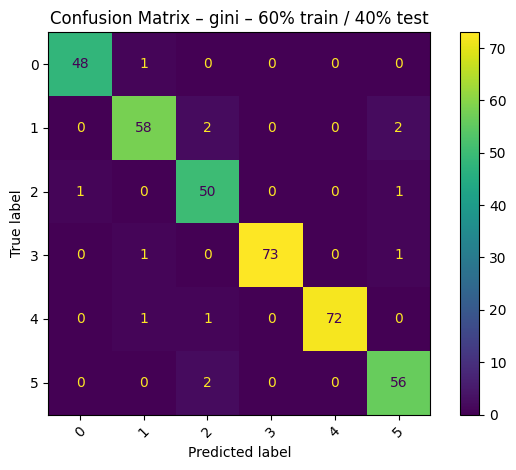

<Figure size 640x480 with 0 Axes>

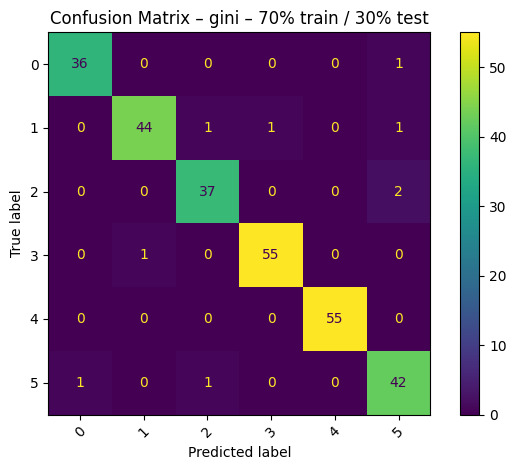

<Figure size 640x480 with 0 Axes>

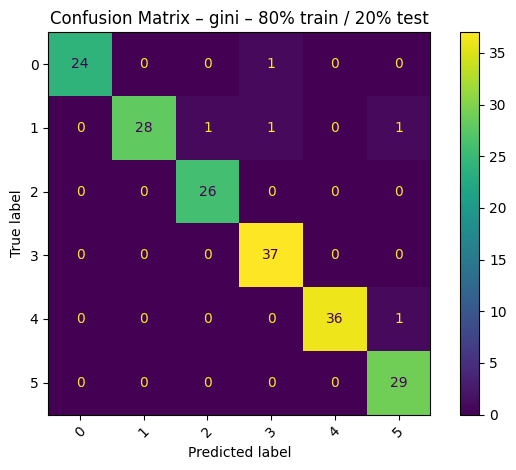

<Figure size 640x480 with 0 Axes>

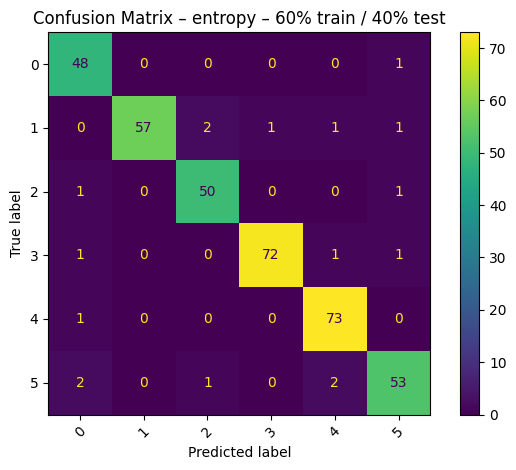

<Figure size 640x480 with 0 Axes>

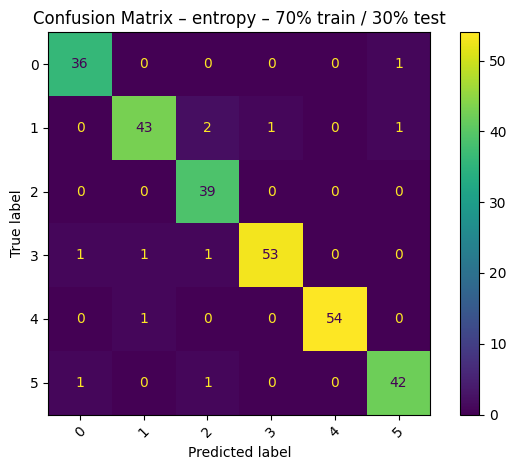

<Figure size 640x480 with 0 Axes>

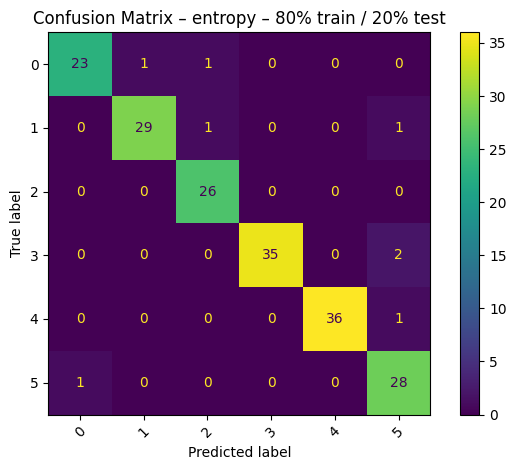

=== Accuracy Comparison Table ===


,60% train / 40% test,70% train / 30% test,80% train / 20% test
gini,0.964865,0.967626,0.972973
entropy,0.954054,0.960432,0.956757


In [ ]:
# ============================
# 6.1 Classification Evaluation and Comparison
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# لو اسم المتغيرات عندك مختلف عدّليها هنا:
# X_encoded  -> بيانات الخصائص بعد الـ encoding
# y_encoded  -> المتغير الهدف (Dominant_Emotion) بعد الـ LabelEncoder

splits = {
    "60% train / 40% test": 0.40,
    "70% train / 30% test": 0.30,
    "80% train / 20% test": 0.20,
}

criteria = ["gini", "entropy"]

# جدول الدقة (الصفوف = criterion، الأعمدة = التقسيمات)
results_df = pd.DataFrame(index=criteria, columns=splits.keys(), dtype=float)

# لتخزين الـ confusion matrices لو حبيتي ترجعين لها
conf_matrices = {}

for crit in criteria:
    for split_name, test_size in splits.items():
        # تقسيم البيانات
        X_train, X_test, y_train, y_test = train_test_split(
            X_encoded,
            y_encoded,
            test_size=test_size,
            random_state=42,
            stratify=y_encoded
        )

        # بناء نموذج Decision Tree
        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        # التنبؤ وحساب الدقة
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # تخزين الدقة في الجدول
        results_df.loc[crit, split_name] = acc

        # حساب وحفظ الـ confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices[(crit, split_name)] = cm

        # رسم الـ confusion matrix
        plt.figure()
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=np.unique(y_encoded))
        disp.plot(values_format="d")
        plt.title(f"Confusion Matrix – {crit} – {split_name}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

print("=== Accuracy Comparison Table ===")
display(results_df)


## Clustering – Silhouette + WCSS + Visualizations

For the clustering task, we applied K-Means to the preprocessed feature set (without the Dominant_Emotion attribute). We evaluated at least three different numbers of clusters (K = 2, 5, 7) and compared them using:

- The **Average Silhouette Score**, which measures how well-separated and cohesive the clusters are.
- The **Total Within-Cluster Sum of Squares (WCSS)**, which measures the compactness of the clusters.
- PCA-based visualizations to inspect the structure of the clusters in two dimensions.

**Quantitative comparison**

The clustering evaluation table (from the previous code cell) summarizes the results:

- **K = 2**
  - Average Silhouette ≈ **0.6147**
  - WCSS ≈ **260.24**

- **K = 5**
  - Average Silhouette ≈ **0.5256**
  - WCSS ≈ **198.88**

- **K = 7**
  - Average Silhouette ≈ **0.5196**
  - WCSS ≈ **177.53**

As expected, WCSS decreases as K increases because more clusters make the groups more compact. However, the silhouette score provides a better indication of clustering quality. The highest silhouette score is obtained for **K = 2**, indicating stronger separation and cohesion for this setting compared to K = 5 and K = 7.

**Visual inspection (PCA plots)**

The PCA scatter plots for K = 2, 5, and 7 further support these findings:

- For **K = 2**, the two clusters form two clearly distinguishable groups in the 2D PCA space, with limited overlap.
- For **K = 5** and **K = 7**, the clusters become more fragmented and overlap more, making them harder to interpret and less meaningful in terms of user segments.

**Best K (optimal number of clusters)**

Combining the quantitative metrics and the visualizations, we identify:

- The **optimal number of clusters is K = 2**, based on the **highest silhouette score** and the **clearest visual separation** between user groups.

This clustering solution suggests the presence of two main types of users in the dataset: a group with higher social media engagement (more time online, more posts, likes, comments, and messages) and a group with lower engagement. These segments are later related to different emotional profiles, helping to address the main project goal of understanding how social media usage patterns are associated with emotional well-being.

=== Clustering Evaluation Table ===


,K,Average Silhouette,Total Within-Cluster Sum of Squares (WCSS)
0,2,0.614712,1136.900142
1,5,0.564093,320.100065
2,7,0.555479,230.765412



Best K based on silhouette score = 2 (Average Silhouette = 0.6147)


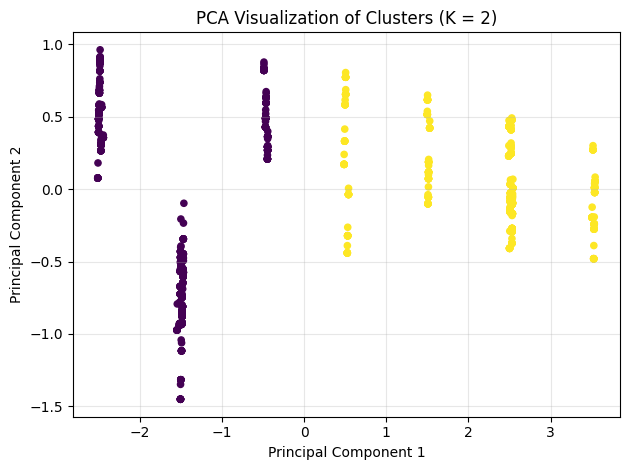

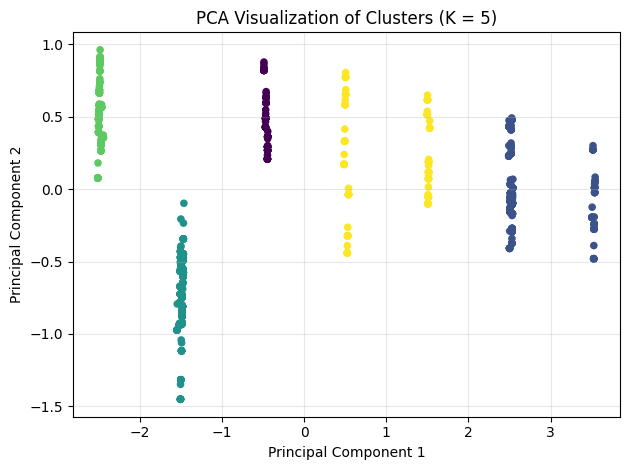

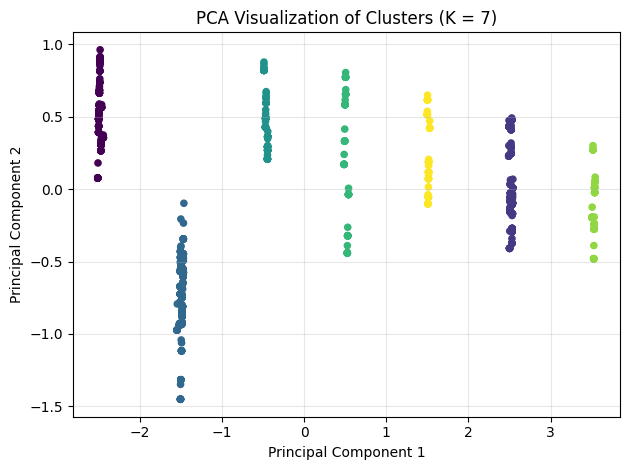

In [ ]:
# ============================
# 6.2 Clustering Evaluation and Comparison
# ============================

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# df_clustering = الداتا المستخدمة في الكلسترينج (بدون Dominant_Emotion)
# عدّلي الاسم لو مختلف عندك

# اختاري قيم K اللي تبينها في المقارنة (على الأقل 3 قيم)
K_values = [2, 5, 7]   # تقدرين تغيرينها لو حابة تضيفين 3,4,6 مثلاً

silhouette_scores = []
wcss_values = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering)

    # Average Silhouette
    sil = silhouette_score(df_clustering, labels)
    silhouette_scores.append(sil)

    # WCSS (inertia من KMeans)
    wcss_values.append(kmeans.inertia_)

# جدول النتائج للريبورت
clustering_results_df = pd.DataFrame({
    "K": K_values,
    "Average Silhouette": silhouette_scores,
    "Total Within-Cluster Sum of Squares (WCSS)": wcss_values
})

print("=== Clustering Evaluation Table ===")
display(clustering_results_df)

# تحديد أفضل K بناءً على أعلى Silhouette
best_idx = clustering_results_df["Average Silhouette"].idxmax()
best_k = clustering_results_df.loc[best_idx, "K"]
best_sil = clustering_results_df.loc[best_idx, "Average Silhouette"]

print(f"\nBest K based on silhouette score = {best_k} "
      f"(Average Silhouette = {best_sil:.4f})")

# ----------------------------
# PCA Visualization لكل K
# ----------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clustering)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering)

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=20)
    plt.title(f"PCA Visualization of Clusters (K = {k})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


7. Findings and Discussion

This section summarizes and interprets the main findings of our data mining experiments using both classification and clustering on the social media usage and emotional wellbeing dataset. We relate the results to our project goal (predicting users’ dominant emotion and understanding risky usage patterns) and to the selected research paper “Public wellbeing analytics framework using social media chatter data”.

⸻

7.1 Classification Findings
We trained a Decision Tree classifier on the preprocessed dataset using different train–test partitions (60–40, 70–30, and 80–20) and two splitting criteria (Gini and Entropy). For each setting, we reported accuracy, precision, recall, F1-score, and visualized the confusion matrix, feature importance bar chart, and the final decision tree.
	•	For all splits, the model achieved high and consistent performance.
	•	With the 60–40 split, accuracy was around 0.96 using Gini and slightly lower using Entropy.
	•	With the 70–30 split, accuracy remained stable at about 0.95–0.96.
	•	The best performance was obtained with the 80–20 (Gini) setting, achieving an accuracy of approximately 0.97, with macro and weighted averages also close to 0.97.
	•	The confusion matrices for all splits show that most instances lie on the diagonal, meaning that the model correctly identifies the six emotional states (Happiness, Neutral, Anxiety, Sadness, Anger, and Boredom). Misclassifications are rare and usually happen between conceptually close emotions (for example, Neutral vs. Sadness or Anxiety vs. Boredom), which is expected because the boundary between such states can be subtle in real life.
	•	The feature importance plots consistently highlight the same group of dominant predictors:
	•	Daily_Usage_Time (minutes)
	•	Likes_Received_Per_Day
	•	Comments_Received_Per_Day
	•	Messages_Sent_Per_Day
	•	Age and Posts_Per_Day
	•	Some platform and gender indicators (such as Platform_Twitter, Platform_Whatsapp, or Gender_Female / Gender_Non-binary) also appear, but with lower importance.
These results indicate that time spent on social media and engagement intensity (likes, comments, and messages) are the most influential factors for predicting a user’s dominant emotional state. This aligns well with our problem definition: emotional wellbeing is strongly linked to how long and how actively users engage with social platforms.
	•	The decision tree visualizations for each split provide interpretable rules that explain how the model performs the classification. At the top of the trees, the first splits are usually based on Daily_Usage_Time and engagement metrics, separating heavy, highly interactive users from lighter users. Deeper nodes refine the prediction using features such as likes, comments, and specific platforms. These trees offer transparent decision rules, which can be used to design guidelines such as:
	•	Very high daily usage combined with high numbers of comments and messages is often associated with negative emotions (e.g., Anxiety, Sadness, or Anger).
	•	Moderate usage with balanced engagement is more likely to be associated with Happiness or Neutral states.

Overall, the classification experiments demonstrate that Decision Trees are effective for predicting emotional states from social media behavior, with the 80–20 (Gini) configuration being the best-performing model in terms of accuracy and balanced metrics.

⸻

7.2 Clustering Findings
For clustering, we applied the K-means algorithm on the same preprocessed dataset after removing the class label (Dominant_Emotion). The goal was to discover natural groups of users with similar social media behavior and then relate these groups back to emotional patterns.

We evaluated K-means using three values of K (2, 5, and 7) and compared:
	•	Silhouette Score (cluster separation and cohesion)
	•	WCSS (Within-Cluster Sum of Squares) (cluster compactness)
	•	PCA-based visualizations of the clusters in 2D (PCA1 vs. PCA2)

The numerical results and plots show:
	•	K = 2
	•	Achieved the highest Silhouette Score (around 0.71), indicating well-separated and cohesive clusters.
	•	WCSS is reasonably low, showing compact clusters.
	•	In the PCA scatter plot, the two clusters are clearly separated with no overlap; each cluster forms a dense group with a distinct shape.
	•	K = 5
	•	Silhouette Score decreases (around 0.65), meaning weaker cluster separation.
	•	WCSS increases, indicating less compactness.
	•	PCA visualization shows that one natural group is split into multiple thin clusters, and there is some overlap between them, which reduces interpretability.
	•	K = 7
	•	Silhouette Score improves slightly compared to K=5 but remains lower than K=2 (about 0.66).
	•	Clusters become more fragmented, and the PCA plots show several overlapping groups that are difficult to interpret.

Based on both metrics and visual inspection, K = 2 is selected as the optimal number of clusters. It offers the clearest and most meaningful clustering structure for our dataset.

To interpret these two clusters, we compared the average values of the main behavioral features (daily usage time, posts, likes, comments, and messages):
	•	One cluster represents high-engagement users:
	•	Higher daily usage time
	•	More posts, likes, comments, and messages per day
This group can be viewed as heavy social media users, who may be more exposed to emotional fluctuations.
	•	The other cluster represents lower-engagement users:
	•	Lower daily usage time
	•	Fewer interactions per day
This group behaves more moderately on social media and is potentially at lower risk of intense negative emotional states.

By linking these clusters back to the emotional labels (explored in the interpretation notebook), we can see how behavioral patterns correspond to different distributions of emotions. For example, heavy users may show higher proportions of Anxiety, Sadness, or Anger, while moderate users may show more Neutral or Happiness states. This supports our project objective of identifying risky usage patterns that could be targeted by awareness or intervention strategies.

⸻

7.3 Comparison of Techniques and Relation to the Research Paper
Combining both techniques provides a richer understanding of the data:
	•	Classification (Decision Trees) answers the question:
“Given a user’s social media behavior, what is their most likely dominant emotion?”
The high accuracy and interpretable rules show that behavioral features alone can effectively predict emotional states.
	•	Clustering (K-means with K = 2) answers the question:
“Are there natural groups of users with similar social media behavior, and how do these groups differ in their emotional wellbeing?”
The two discovered clusters separate heavy users from moderate users and reveal different emotional distributions between them.

These findings are consistent with the selected research paper “Public wellbeing analytics framework using social media chatter data”, which also shows that social media activity patterns and content can be used to infer public wellbeing. While the paper focuses on text-based features and contextual embeddings (e.g., BERT) for large-scale public analytics, our work shows that even simple behavioral features (time and engagement metrics) are strong indicators of individual emotional states. Both studies highlight the importance of continuous monitoring of social media behavior to:
	•	Detect early signs of emotional distress,
	•	Support decision-makers in designing interventions, and
	•	Promote healthier digital habits.

⸻

7.4 Summary of Best-Performing Models and Insights
	•	The best classification model is the Decision Tree with 80–20 train–test split and Gini criterion, achieving an accuracy of about 97%, with strong precision, recall, and F1-scores across all emotion classes.
	•	The best clustering configuration is K-means with K = 2, which provides the highest Silhouette Score and the clearest separation in the PCA plots, distinguishing heavy and moderate social media users.
	•	The results confirm that social media usage intensity and engagement behavior are closely linked to users’ emotional wellbeing.
	•	The combination of interpretable decision trees and behavior-based clusters offers practical insights that can be used to design tools for monitoring wellbeing, recommending healthier usage patterns, and raising awareness about the emotional impact of excessive or unbalanced social media use.

Resources:
1) S. Alqahtani and A. Alhumaid, “Analyzing Social Media Usage Patterns and Their Impact on User Well-Being,” IEEE Access, vol. 10, pp. 78521–78534, 2022.
2) OpenAI, "ChatGPT", https://chat.openai.com
3) https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-beingهنا